## __Task 7: Support Vector Machines (SVM)__

### __Importing libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


### __1.Load and prepare a dataset for binary classification.__

In [3]:
df=pd.read_csv("D:/AI ML Intern Elevate Labs Benglore/Task 7 SVM/breast-cancer.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X=df.drop('diagnosis',axis=1)
y=df["diagnosis"]


In [9]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled = scaler.transform(X_test)         

In [13]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)
X.shape

(114, 31)
(455, 31)


(569, 31)

### __2.Train an SVM with linear and RBF kernel.__

In [15]:
linear_svm=SVC(kernel="linear",C=1.0)
linear_svm.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [17]:
rbf_svm=SVC(kernel="rbf",C=1.0,gamma=0.5)
rbf_svm.fit(X_train_scaled,y_train)

SVC(gamma=0.5)

### __3.Visualize decision boundary using 2D data.__

In [19]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)


# Train SVM on PCA data (2D)
linear_svm_pca = SVC(kernel='linear').fit(X_pca, y_train)
rbf_svm_pca = SVC(kernel='rbf', gamma=0.5).fit(X_pca, y_train)


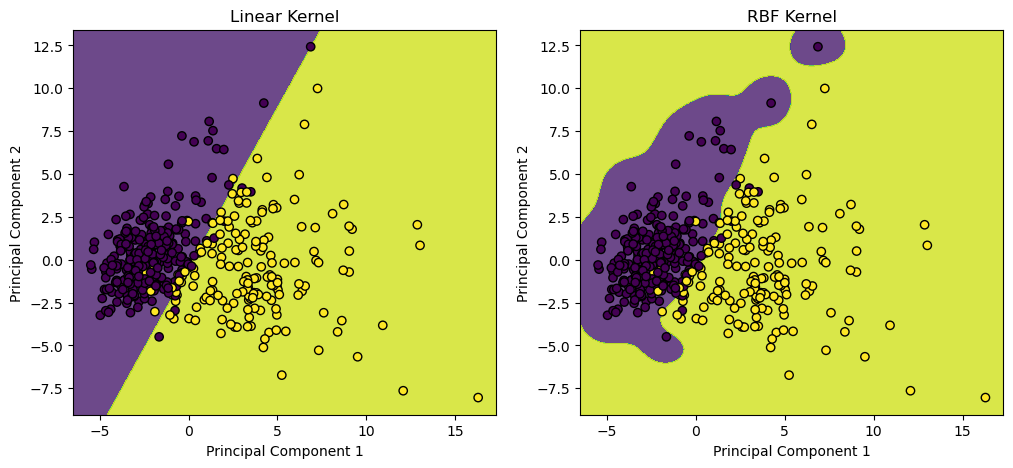

In [21]:
def plot_decision_boundary(model, X, y, title):
    # Create mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # print(xx)
    # print("\n")
    # print(yy)
    # print("\n")

    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # print(Z)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svm_pca, X_pca, y_train, 'Linear Kernel')
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svm_pca, X_pca, y_train, 'RBF Kernel')
plt.show()

### __4.Tune hyperparameters like C and gamma.__

In [23]:
# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid.best_params_}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

### __5.Use cross-validation to evaluate performance__

In [ ]:
best_model = grid.best_estimator_

cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
